In [5]:
import pandas
import configparser
import psycopg2

In [6]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [7]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [8]:
sql = "select * from student"

In [9]:
df = pandas.read_sql_query(sql,conn)

df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s3,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,gs


In [10]:
sql = """

select professor.p_name, course.c_name
from professor
inner join course
on professor.p_email = course.p_email

"""

In [11]:
df = pandas.read_sql_query(sql,conn)

df[:]

,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


In [12]:
sql = """

select  * from student

"""

In [13]:
df = pandas.read_sql_query(sql,conn)

df[:]


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s3,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,gs


In [14]:
sql = """

select count(*) as num_stu, c_number
from enroll
group by c_number

"""

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='c_number'>

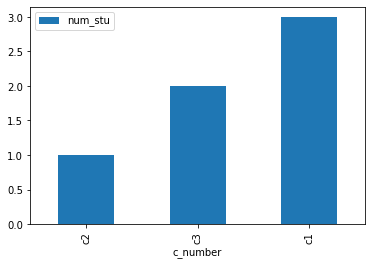

In [15]:
df = pandas.read_sql_query(sql,conn)

df.plot.bar(y= 'num_stu', x= 'c_number')


In [16]:
sql = """

select professor.p_name, count(*) as num_course
from professor
inner join course
on professor.p_email = course.p_email
group by professor.p_name

"""


<AxesSubplot:xlabel='p_name'>

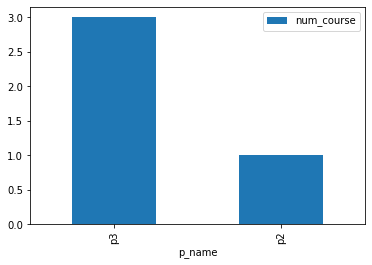

In [17]:
df = pandas.read_sql_query(sql,conn)

df.plot.bar(x='p_name',y='num_course')


In [18]:
sql = """

insert into student (s_email,s_name,major)
values('{}','{}','{}')

""".format('s5@jmu.edu','s5','gs')

print(sql)




insert into student (s_email,s_name,major)
values('s5@jmu.edu','s5','gs')




In [19]:
cur=conn.cursor()

In [20]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "student_pkey"
DETAIL:  Key (s_email)=(s5@jmu.edu) already exists.


In [ ]:
conn.commit()

In [ ]:
df = pandas.read_sql_query('select * from student',conn)

df[:]


In [ ]:
sql = """

insert into professor (p_email,p_name,office)
values('{}','{}','{}')

""".format('p4@jmu.edu','p4','o4')

print(sql)

In [ ]:
cur=conn.cursor()

In [ ]:
cur.execute(sql)

In [ ]:
conn.commit()

In [25]:
df = pandas.read_sql_query('select * from professor',conn)

df[:]

,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [35]:
sql = """

insert into course (c_number,c_name,room,p_email)
values('{}','{}','{}','{}')

""".format('c5','linkedin','r4','p4@jmu.edu')

print(sql)



insert into course (c_number,c_name,room,p_email)
values('c5','linkedin','r4','p4@jmu.edu')




In [36]:
cur=conn.cursor()

In [37]:
cur.execute(sql)

In [38]:
sql = """ select * from course """

In [39]:
df = pandas.read_sql_query(sql,conn)

df[:]

,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r3,p3@jmu.edu
4,c5,linkedin,r4,p4@jmu.edu


In [48]:
sql = """

update course 
set p_email = 'p4@jmu.edu'
where p_email = 'p2@jmu.edu'

"""

print(sql)



update course 
set p_email = 'p4@jmu.edu'
where p_email = 'p2@jmu.edu'




In [49]:
cur=conn.cursor()

In [50]:
cur.execute(sql)

In [51]:
sql = """ select * from course """

In [52]:
df = pandas.read_sql_query(sql,conn)

df[:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r3,p3@jmu.edu
3,c5,linkedin,r4,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [61]:
sql = """

delete from professor
where p_email = 'p2@jmu.edu'

"""
print(sql)



delete from professor
where p_email = 'p2@jmu.edu'




In [62]:
cur=conn.cursor()

In [63]:
cur.execute(sql)

In [64]:
sql = """ select * from professor """

In [65]:
df = pandas.read_sql_query(sql,conn)

df[:]

,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4
